***Exercise 2, Questions C,D***



We repeat what we did in questions A,B,D,  but this time using the CIFAR10 dataset. Moreover, we generate adversarial examples for each class for only one image from our dataset. The dataset contains a total of 60,000 colored images, of size 32x32, divided into ten different image classes, e.g. horse, duck, truck, etc.


***Global Imports***

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, GaussianNoise
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Reshape, Conv2DTranspose, LeakyReLU
import tensorflow as tf
import os
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from sklearn.manifold import SpectralEmbedding
from keras import backend as K
from keras.utils.vis_utils import plot_model


from tensorflow.keras import datasets


***Dataset load and preprocessing***

The CIFAR10 dataset, is already partitioned into training (50000 items) and test (10000 items) sets. 

Before we start with the training process:


-> We convert the pictures to grayscale


-> We normalize the image data to the interval [0, 1]. 


-> We create one-hot vectors for each label in our dataset.



In [ ]:
# Load the CIFAR10 data set
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


#convert images to grayscale
x_train = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) for image in x_test])

print(x_train.shape)
print(x_test.shape)


#normalize the image data to the interval [0, 1]. This is done by dividing by 255.
x_train = x_train / 255.0
x_test = x_test / 255.0


#create one-hot vectors for each label in the data set
label_set = np.sort(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, len(label_set))
y_test = keras.utils.to_categorical(y_test, len(label_set))


(50000, 32, 32)
(10000, 32, 32)


***Architecture, compilation and fitting of our model***


Now we construct a more complicated model with:


-> 2 convolutional layers with filters = 32, and the ReLU as activation function. We also add a MaxPooling and a dropout layer.

-> 2 convolutional layers with filters = 64 and the ReLU as activation function. We also add a MaxPooling and a dropout layer.

-> 2 convolutional layers with filters = 128 and the ReLU as activation function. We also add a MaxPooling and a dropout layer, and we flatten the output.

-> a fully connected layer with 128 nodes and the ReLU as an activation function. We also add a dropout layer.

-> a fully connected layer as the output layer of our model, with 10 nodes and the softmax as an activation function.

We compile using the Adam optimizer (with a learning rate of 0.0001), and the categorical crossentropy loss function.

We train the models for 15 epochs, until we get a satisfying accuracy of 0.7186.

In [ ]:
modeld = Sequential()
modeld.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
modeld.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modeld.add(MaxPooling2D((2, 2)))
modeld.add(Dropout(0.2))
modeld.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modeld.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modeld.add(MaxPooling2D((2, 2)))
modeld.add(Dropout(0.2))
modeld.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modeld.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modeld.add(MaxPooling2D((2, 2)))
modeld.add(Dropout(0.2))
modeld.add(Flatten())
modeld.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modeld.add(Dropout(0.2))
modeld.add(Dense(10, activation='softmax'))

modeld.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
modeld.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

Epoch 1/15
782/782 [==============================] - 4s 4ms/step - loss: 2.0822 - accuracy: 0.2315 - val_loss: 1.7268 - val_accuracy: 0.3759
Epoch 2/15
782/782 [==============================] - 3s 4ms/step - loss: 1.6887 - accuracy: 0.3821 - val_loss: 1.5539 - val_accuracy: 0.4471
Epoch 3/15
782/782 [==============================] - 3s 4ms/step - loss: 1.5219 - accuracy: 0.4530 - val_loss: 1.4516 - val_accuracy: 0.4838
Epoch 4/15
782/782 [==============================] - 3s 4ms/step - loss: 1.4047 - accuracy: 0.4964 - val_loss: 1.3353 - val_accuracy: 0.5273
Epoch 5/15
782/782 [==============================] - 3s 4ms/step - loss: 1.3135 - accuracy: 0.5354 - val_loss: 1.2617 - val_accuracy: 0.5518
Epoch 6/15
782/782 [==============================] - 3s 4ms/step - loss: 1.2396 - accuracy: 0.5632 - val_loss: 1.1363 - val_accuracy: 0.6020
Epoch 7/15
782/782 [==============================] - 3s 4ms/step - loss: 1.1703 - accuracy: 0.5867 - val_loss: 1.2470 - val_accuracy: 0.5691
Epoch 

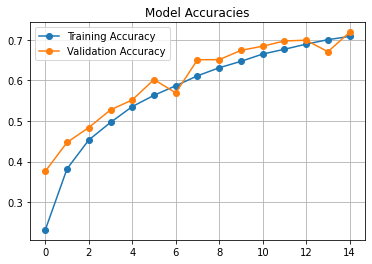

In [ ]:
modeld_path = "cifar10_model.saved_model"
modeld_history_path = "cifar10_model.saved_model_history"


modeld.fit(x_train, y_train,
           batch_size = 64,
           epochs = 15,
           verbose = 1,
           validation_data = (x_test, y_test))


history = modeld.history.history
modeld.save(modeld_path)
pickle.dump(history, open(modeld_history_path, "wb"))

print(f"Training Accuracy: {history['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model Accuracies")
plt.plot(history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

***Architecture and compilation of the generator model***


The generator will basically be a neural network that has only one input neuron, and as an output, it returns arrays of size 32x32. We construct this network with:

->  a fully connected layer with 16 nodes and the Leaky ReLU as an activation function.


-> 3 transpose convolutional layers with filters = 512, 768 and 1024 respectively and the Leaky ReLU as activation function. 

-> a fully connected layer as the output layer of our model, with 1024 nodes and the sigmoid as activation function.

We compile using the Adam optimizer (with a learning rate of 0.0002), and the categorical crossentropy loss function.

In [ ]:
modelg=Sequential()
modelg.add(Dense(1 * 4 * 4, input_shape = (1,), activation = LeakyReLU(alpha=0.2)))
modelg.add(Reshape((4, 4, 1)))
modelg.add(Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', activation = LeakyReLU(alpha=0.2)))
modelg.add(Conv2DTranspose(768, (4,4), strides=(2,2), padding='same', activation = LeakyReLU(alpha=0.2)))
modelg.add(Conv2DTranspose(1024, (4,4), strides=(2,2), padding='same', activation = LeakyReLU(alpha=0.2)))
modelg.add(Dense(1, activation='sigmoid'))
modelg.add(Reshape((32, 32, 1)))


modelg.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), metrics = ["accuracy"])
modelg.summary()




Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                32        
                                                                 
 reshape_6 (Reshape)         (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 8, 8, 512)        8704      
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 16, 16, 768)      6292224   
 Transpose)                                                      
                                                                 
 conv2d_transpose_11 (Conv2D  (None, 32, 32, 1024)     12583936  
 Transpose)                                                      
                                                     

***Architecture, compilation and fitting of the composite model***

We 'bind' modeld and modelg together, creating a composite model, modelgan, which is the one we are going to implement the training on. Of course during this training process, we only want the weights of modelg being updated, so we declare modeld as non trainable.

In [ ]:
# define the combined generator and discriminator model, for updating the generator
#make weights in the discriminator not trainable
modeld.trainable = False
# connect them
modelgan = Sequential()
modelgan.add(modelg)
modelgan.add(modeld)

# compile model
modelgan.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), metrics = ["accuracy"])
modelgan.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 32, 32, 1)         18885921  
                                                                 
 sequential_10 (Sequential)  (None, 10)                549994    
                                                                 
Total params: 19,435,915
Trainable params: 18,885,921
Non-trainable params: 549,994
_________________________________________________________________


We choose a sample from the CIFAR10 dataset. We also make sure that modeld predicts correctly its label: 

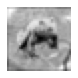

frog


In [ ]:
plt.subplot(3, 3, 1)
# turn off axis
plt.axis('off')
# plot raw pixel data
plt.imshow(x_train[0].reshape(32, 32,), cmap='gray_r')
plt.show()

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

print(labels[np.argmax(modeld.predict(x_train[0].reshape(1,32,32,1)))])

In [ ]:
np.expand_dims(x_train[0],axis=-1).shape

(32, 32, 1)

We train modelgan doing the following:
for each sample i we picked, and for each class j that is different than this of the corresponding samples, we repeat for as many times as needed:


-> train modelg with target equal to sample i. 


-> train modelgan with target equal the one-hot encoding of label j.

In [ ]:
adv = []

for j in range(10):
  if j != 6:
    for k in range(200):
      modelg.train_on_batch([np.array([1])],x_train[0].reshape((1,32,32,1)))
      modelgan.train_on_batch([np.array([1])], keras.utils.to_categorical(j, len(label_set)).reshape(1,10))
    adv.append(modelg.predict([np.array([1])]))


Below we present the pictures we get from modelg, together with the label that modeld assigned to each one of them. 

As we can observe, most of the images generated by modelg look like real samples from the MNIST dataset, and it wouldn't be difficult for a human to correctly classify them. 

However, our modeld, which previously scored a descent accuracy of 0.7186, not only fails to correctly predict the 'true' labels of all of them, but it also assigns different 'wrong' classes to pictures which to the human eye, are very similar one to each other. And that was exactly what we were aiming for, when training modelg.

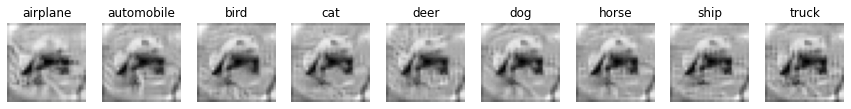

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(adv)):
  plt.subplot(5, 10 - 1, i+1)
  plt.axis('off')
  plt.imshow(adv[i].reshape((32,32)), cmap='gray_r')
  plt.title(labels[np.argmax(modeld.predict(adv[i]))])

plt.show()



***Architecture, compilation and fitting of a model that is robust to the adversarial examples we generated***


We now define the same modelt we used in the previous question.
We train it for 25 epochs on the CIFAR10 dataset, and we get an accuracy of 0.6830.



In [ ]:
modelt = Sequential()
modelt.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.2))
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.3))
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(GaussianNoise(0.4))

modelt.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelt.add(BatchNormalization())
modelt.add(MaxPooling2D((2, 2)))
modelt.add(Dropout(0.4))
modelt.add(GaussianNoise(0.4))
modelt.add(Flatten())

modelt.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelt.add(BatchNormalization())
modelt.add(Dropout(0.5))
modelt.add(GaussianNoise(0.4))

modelt.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
modelt.add(BatchNormalization())
modelt.add(Dropout(0.5))
modelt.add(GaussianNoise(0.4))
modelt.add(Dense(10, activation='softmax'))

modelt.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
modelt.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 gaussian_noise_8 (GaussianN  (None, 32, 32, 32)       0         
 oise)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                     

Epoch 1/25
782/782 [==============================] - 6s 6ms/step - loss: 3.0456 - accuracy: 0.1457 - val_loss: 2.8272 - val_accuracy: 0.1552
Epoch 2/25
782/782 [==============================] - 5s 6ms/step - loss: 2.4844 - accuracy: 0.2110 - val_loss: 2.4644 - val_accuracy: 0.1837
Epoch 3/25
782/782 [==============================] - 5s 6ms/step - loss: 2.1930 - accuracy: 0.2519 - val_loss: 2.2912 - val_accuracy: 0.2156
Epoch 4/25
782/782 [==============================] - 5s 6ms/step - loss: 2.0127 - accuracy: 0.2835 - val_loss: 2.2730 - val_accuracy: 0.2275
Epoch 5/25
782/782 [==============================] - 5s 6ms/step - loss: 1.8910 - accuracy: 0.3158 - val_loss: 2.2086 - val_accuracy: 0.2392
Epoch 6/25
782/782 [==============================] - 5s 6ms/step - loss: 1.8061 - accuracy: 0.3401 - val_loss: 2.0429 - val_accuracy: 0.2793
Epoch 7/25
782/782 [==============================] - 5s 6ms/step - loss: 1.7356 - accuracy: 0.3628 - val_loss: 2.0256 - val_accuracy: 0.2880
Epoch 

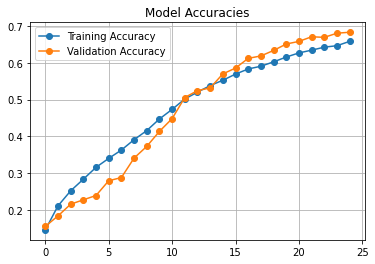

In [ ]:
modelt_path = "modelt.saved_model"
modelt_history_path = "modelt.saved_model_history"


modelt.fit(x_train, y_train,
           batch_size = 64,
           epochs = 25,
           verbose = 1,
           validation_data = (x_test, y_test))


history = modelt.history.history
modelt.save(modelt_path)
pickle.dump(history, open(modelt_history_path, "wb"))

print(f"Training Accuracy: {history['accuracy'][-1]:.4}")
print(f"Validation Accuracy: {history['val_accuracy'][-1]:.4}")


plt.figure()
plt.title("Model Accuracies")
plt.plot(history["accuracy"], marker = "o", label = "Training Accuracy")
plt.plot(history["val_accuracy"], marker = "o", label = "Validation Accuracy")
plt.legend()
plt.grid()

We then feed the adversarial examples we generated using modelg, to modelt, and get predictions for their class.

From the graph below, we observe that modelt manages to successfully recognize only 2 of them.

It seems that among those 9 adversarial examples, a 2/3 of them still manages to trick it the way they are supposed to.
So overally our model doesn't seem to be as robust to adversarial examples as it used to be when we were using the MNIST dataset.


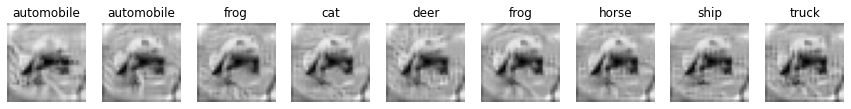

In [ ]:
plt.figure(figsize=(15,15))
for i in range(len(adv)):
  plt.subplot(5, 10 - 1, i+1)
  plt.axis('off')
  plt.imshow(adv[i].reshape((32,32)), cmap='gray_r')
  plt.title(labels[np.argmax(modelt.predict(adv[i]))])

plt.show()


***References:***


https://ml.berkeley.edu/blog/posts/adversarial-examples/


https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/


https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/


https://jis-eurasipjournals.springeropen.com/articles/10.1186/s13635-021-00125-2?fbclid=IwAR21tXAiSIY7tU72N3aDVudcy7qdiyj7tALCrSvkx3eBIKjsOTWfb6c0X0A